<a href="https://colab.research.google.com/github/rioas0/MachineLearning/blob/main/Kerastes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
print(tf.__version__)

2.2.0


In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip \
  -O /tmp/messy_vs_clean_room.zip

--2020-06-11 10:29:33--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  24.0MB/s    in 2.8s    

2020-06-11 10:29:36 (24.0 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
import zipfile,os
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir('/tmp/images/val')

['messy', 'clean']

In [ ]:
os.listdir('/tmp/images/train')

['messy', 'clean']

In [ ]:
train_clean_dir = os.path.join(train_dir, 'clean')
train_messy_dir = os.path.join(train_dir, 'messy')
validation_clean_dir = os.path.join(validation_dir, 'clean')
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
)

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest'
)

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=4,
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer= tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
    train_generator,
    steps_per_epoch=25,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=5,
    verbose=2
)

Epoch 1/20
25/25 - 6s - loss: 0.7240 - accuracy: 0.5200 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/20
25/25 - 6s - loss: 0.6959 - accuracy: 0.4800 - val_loss: 0.6923 - val_accuracy: 0.5500
Epoch 3/20
25/25 - 6s - loss: 0.6925 - accuracy: 0.5200 - val_loss: 0.6877 - val_accuracy: 0.5000
Epoch 4/20
25/25 - 6s - loss: 0.6849 - accuracy: 0.6000 - val_loss: 0.6922 - val_accuracy: 0.5000
Epoch 5/20
25/25 - 6s - loss: 0.6726 - accuracy: 0.6100 - val_loss: 0.5657 - val_accuracy: 0.8000
Epoch 6/20
25/25 - 6s - loss: 0.7054 - accuracy: 0.5800 - val_loss: 0.6934 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 6s - loss: 0.7049 - accuracy: 0.4500 - val_loss: 0.6927 - val_accuracy: 0.5000
Epoch 8/20
25/25 - 6s - loss: 0.6898 - accuracy: 0.5900 - val_loss: 0.6834 - val_accuracy: 0.5000
Epoch 9/20
25/25 - 6s - loss: 0.6737 - accuracy: 0.5000 - val_loss: 0.6239 - val_accuracy: 0.5500
Epoch 10/20
25/25 - 6s - loss: 0.5820 - accuracy: 0.6900 - val_loss: 0.6244 - val_accuracy: 0.6500
Epoch 11/20
25/25 -

Saving download.jpg to download (1).jpg
download.jpg
messy


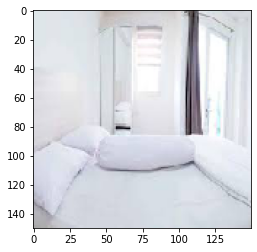

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpig
import matplotlib.pyplot as plt
import matplotlib.image as mpig
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')